In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
from os.path import join, exists, dirname, basename
from sklearn.metrics import pairwise_distances 

from skbio.stats.ordination import pcoa

ModuleNotFoundError: No module named 'skbio'

In [40]:
exist_df = pd.read_csv(join('..','Data', 'exist.csv'), index_col=0).T
# index -> People
# columns -> peptides
# fold peptides

metadata = pd.read_csv(join('..','Data', 'metadata.csv'), index_col=0)

diagnosis = metadata[['sample_id','cohort', 'sex', 'appendectomy', 'smoking', 'diagnosis']]
diagnosis.loc[:,'sample_id'] = diagnosis['sample_id'].apply(lambda x: str(x).replace('.', '-'))
diagnosis = diagnosis.set_index('sample_id')
diagnosis.dropna(inplace=True)

exist_df_descriptive = exist_df.join(diagnosis, how='inner')
data_existis = exist_df_descriptive.copy().drop(columns=['cohort'])

In [41]:
diagnosis

cohort     sex appendectomy         smoking  \
sample_id                                                                       
R33P01_01_N003_IBD-Chile_A_T_C2  Control    Male           No           Never   
R33P01_02_N006_IBD-Chile_A_T_C2  Control  Female           No           Never   
R33P01_03_N008_IBD-Chile_A_T_C2  Control  Female          Yes           Never   
R33P01_04_N011_IBD-Chile_A_T_C2  Control    Male           No           Never   
R33P01_05_N013_IBD-Chile_A_T_C2  Control  Female           No           Never   
...                                  ...     ...          ...             ...   
R33P01_76_N082_IBD-Chile_A_T_C2  Disease  Female           No       Ex_smoker   
R33P01_77_N085_IBD-Chile_A_T_C2  Disease  Female          Yes           Never   
R33P01_78_N091_IBD-Chile_A_T_C2  Disease  Female           No           Never   
R33P01_79_N092_IBD-Chile_A_T_C2  Disease  Female           No  Current_smoker   
R33P01_80_N094_IBD-Chile_A_T_C2  Disease  Female           No           Never   

                                diagnosis  
sample_id                                  
R33P01_01_N003_IBD-Chile_A_T_C2   Control  
R33P01_02_N006_IBD-Chile_A_T_C2   Control  
R33P01_03_N008_IBD-Chile_A_T_C2   Control  
R33P01_04_N011_IBD-Chile_A_T_C2   Control  
R33P01_05_N013_IBD-Chile_A_T_C2   Control  
...                                   ...  
R33P01_76_N082_IBD-Chile_A_T_C2        CD  
R33P01_77_N085_IBD-Chile_A_T_C2        CD  
R33P01_78_N091_IBD-Chile_A_T_C2        UC  
R33P01_79_N092_IBD-Chile_A_T_C2        UC  
R33P01_80_N094_IBD-Chile_A_T_C2        UC  

[78 rows x 5 columns]

In [42]:
### pcoa
distance_jaccard = pairwise_distances(data_existis.values.astype(bool), metric='jaccard')

pcoa_exist = pcoa(distance_jaccard, number_of_dimensions=2)
explained_variance = pcoa_exist.proportion_explained
pcoa_df = pd.DataFrame(pcoa_exist.samples.values, index=data_existis.index, columns=['PC1', 'PC2'])
pcoa_df['cohort'] = diagnosis.loc[pcoa_df.index, 'cohort'].values


In [43]:
pcoa_df

PC1       PC2   cohort
R33P01_01_N003_IBD-Chile_A_T_C2 -0.077216 -0.053990  Control
R33P01_02_N006_IBD-Chile_A_T_C2 -0.096711 -0.065546  Control
R33P01_03_N008_IBD-Chile_A_T_C2  0.119345  0.010885  Control
R33P01_04_N011_IBD-Chile_A_T_C2 -0.137949  0.103781  Control
R33P01_05_N013_IBD-Chile_A_T_C2  0.019654  0.139678  Control
...                                   ...       ...      ...
R33P01_76_N082_IBD-Chile_A_T_C2  0.403295  0.146615  Disease
R33P01_77_N085_IBD-Chile_A_T_C2 -0.111234  0.075000  Disease
R33P01_78_N091_IBD-Chile_A_T_C2  0.073126  0.113413  Disease
R33P01_79_N092_IBD-Chile_A_T_C2 -0.069377 -0.061539  Disease
R33P01_80_N094_IBD-Chile_A_T_C2 -0.037641  0.090196  Disease

[78 rows x 3 columns]

<Axes: xlabel='PC1', ylabel='PC2'>

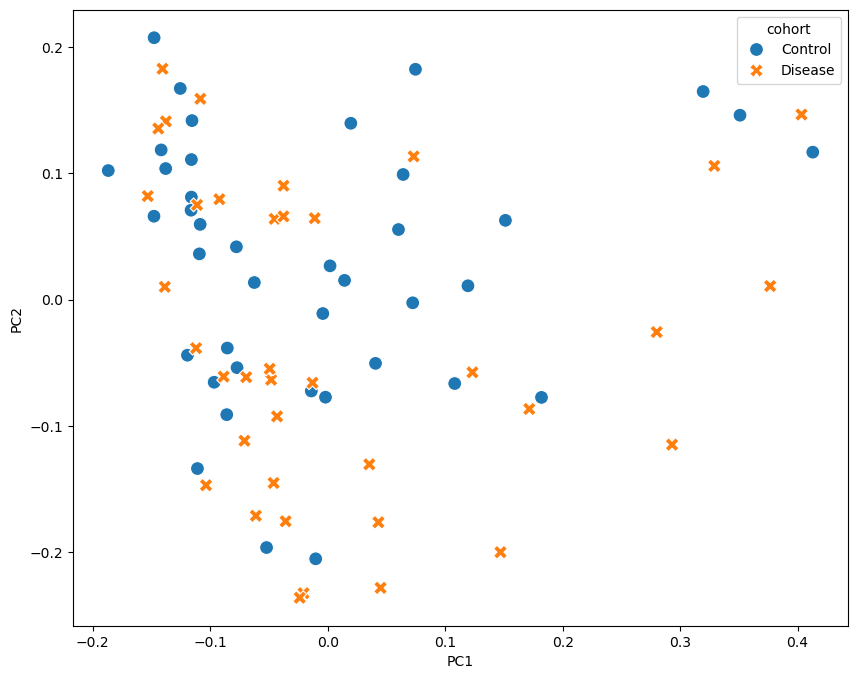

In [44]:
plt.figure(figsize=(10, 8))

sns.scatterplot(data=pcoa_df, x='PC1', y='PC2', hue='cohort', style='cohort', s=100)

# Fold

In [45]:
fold = pd.read_csv(join('..','Data', 'fold.csv'), index_col=0).T
fold = fold.join(diagnosis, how='inner')

# Separate fold data (numerical) from diagnosis columns (categorical)
diagnosis_columns = ['cohort', 'sex', 'appendectomy', 'smoking', 'diagnosis']
fold_data = fold.drop(columns=diagnosis_columns).astype(float)

In [46]:
fold_data.head(5)

agilent_10  agilent_100076  agilent_100147  \
R33P01_01_N003_IBD-Chile_A_T_C2         0.0             0.0             0.0   
R33P01_02_N006_IBD-Chile_A_T_C2         0.0             0.0             0.0   
R33P01_03_N008_IBD-Chile_A_T_C2         0.0             0.0             0.0   
R33P01_04_N011_IBD-Chile_A_T_C2         0.0             0.0             0.0   
R33P01_05_N013_IBD-Chile_A_T_C2         0.0             0.0             0.0   

                                 agilent_100176  agilent_100204  \
R33P01_01_N003_IBD-Chile_A_T_C2             0.0             0.0   
R33P01_02_N006_IBD-Chile_A_T_C2             0.0             0.0   
R33P01_03_N008_IBD-Chile_A_T_C2             0.0             0.0   
R33P01_04_N011_IBD-Chile_A_T_C2             0.0             0.0   
R33P01_05_N013_IBD-Chile_A_T_C2             0.0             0.0   

                                 agilent_100206  agilent_100215  \
R33P01_01_N003_IBD-Chile_A_T_C2             0.0             0.0   
R33P01_02_N006_IBD-Chile_A_T_C2             0.0             0.0   
R33P01_03_N008_IBD-Chile_A_T_C2             0.0             0.0   
R33P01_04_N011_IBD-Chile_A_T_C2             0.0             0.0   
R33P01_05_N013_IBD-Chile_A_T_C2             0.0             0.0   

                                 agilent_100240  agilent_100245  \
R33P01_01_N003_IBD-Chile_A_T_C2             0.0             0.0   
R33P01_02_N006_IBD-Chile_A_T_C2             0.0             0.0   
R33P01_03_N008_IBD-Chile_A_T_C2             0.0             0.0   
R33P01_04_N011_IBD-Chile_A_T_C2             0.0             0.0   
R33P01_05_N013_IBD-Chile_A_T_C2             0.0             0.0   

                                 agilent_100253  ...  twist_99737  twist_9974  \
R33P01_01_N003_IBD-Chile_A_T_C2           0.000  ...          0.0         0.0   
R33P01_02_N006_IBD-Chile_A_T_C2           0.000  ...          0.0         0.0   
R33P01_03_N008_IBD-Chile_A_T_C2           0.000  ...          0.0         0.0   
R33P01_04_N011_IBD-Chile_A_T_C2         107.785  ...          0.0         0.0   
R33P01_05_N013_IBD-Chile_A_T_C2           0.000  ...          0.0         0.0   

                                 twist_9975  twist_9977  twist_99804  \
R33P01_01_N003_IBD-Chile_A_T_C2         0.0         0.0          0.0   
R33P01_02_N006_IBD-Chile_A_T_C2         0.0         0.0          0.0   
R33P01_03_N008_IBD-Chile_A_T_C2         0.0         0.0          0.0   
R33P01_04_N011_IBD-Chile_A_T_C2         0.0         0.0          0.0   
R33P01_05_N013_IBD-Chile_A_T_C2         0.0         0.0          0.0   

                                 twist_99816  twist_99830  twist_99880  \
R33P01_01_N003_IBD-Chile_A_T_C2          0.0          0.0          0.0   
R33P01_02_N006_IBD-Chile_A_T_C2          0.0          0.0          0.0   
R33P01_03_N008_IBD-Chile_A_T_C2          0.0          0.0          0.0   
R33P01_04_N011_IBD-Chile_A_T_C2          0.0          0.0          0.0   
R33P01_05_N013_IBD-Chile_A_T_C2          0.0          0.0          0.0   

                                 twist_99911  twist_99954  
R33P01_01_N003_IBD-Chile_A_T_C2          0.0          0.0  
R33P01_02_N006_IBD-Chile_A_T_C2          0.0          0.0  
R33P01_03_N008_IBD-Chile_A_T_C2          0.0          0.0  
R33P01_04_N011_IBD-Chile_A_T_C2          0.0          0.0  
R33P01_05_N013_IBD-Chile_A_T_C2          0.0          0.0  

[5 rows x 13106 columns]

In [47]:
# descriptive statistics
display(fold_data.describe())
# n_0s
fold_data.apply(lambda x: (x == 0).sum(), axis=0).sort_values(ascending=True)

/Users/gabrielmiranda/micromamba/envs/SaaLab/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/gabrielmiranda/micromamba/envs/SaaLab/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/gabrielmiranda/micromamba/envs/SaaLab/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/gabrielmiranda/micromamba/envs/SaaLab/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/gabrielmiranda/micromamba/envs/SaaLab/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


agilent_10  agilent_100076  agilent_100147  agilent_100176  \
count   78.000000       78.000000       78.000000       78.000000   
mean    13.567141        1.403667        0.395897        0.164269   
std    109.565779       12.396848        3.496471        1.450787   
min      0.000000        0.000000        0.000000        0.000000   
25%      0.000000        0.000000        0.000000        0.000000   
50%      0.000000        0.000000        0.000000        0.000000   
75%      0.000000        0.000000        0.000000        0.000000   
max    964.310000      109.486000       30.880000       12.813000   

       agilent_100204  agilent_100206  agilent_100215  agilent_100240  \
count       78.000000       78.000000       78.000000       78.000000   
mean         1.460436        3.169692        0.322705        7.042821   
std         12.898221       27.993964        2.850055       34.993232   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        0.000000        0.000000        0.000000   
50%          0.000000        0.000000        0.000000        0.000000   
75%          0.000000        0.000000        0.000000        0.000000   
max        113.914000      247.236000       25.171000      278.565000   

       agilent_100245  agilent_100253  ...  twist_99737  twist_9974  \
count       78.000000       78.000000  ...    78.000000   78.000000   
mean         1.057013        1.381859  ...     1.019692    0.130487   
std          9.335284       12.204248  ...     9.005679    1.152432   
min          0.000000        0.000000  ...     0.000000    0.000000   
25%          0.000000        0.000000  ...     0.000000    0.000000   
50%          0.000000        0.000000  ...     0.000000    0.000000   
75%          0.000000        0.000000  ...     0.000000    0.000000   
max         82.447000      107.785000  ...    79.536000   10.178000   

       twist_9975  twist_9977  twist_99804  twist_99816  twist_99830  \
count   78.000000    78.00000    78.000000    78.000000         78.0   
mean     0.132654     0.32209     7.814192     0.019538          0.0   
std      1.171567     2.84462    48.593395     0.172559          0.0   
min      0.000000     0.00000     0.000000     0.000000          0.0   
25%      0.000000     0.00000     0.000000     0.000000          0.0   
50%      0.000000     0.00000     0.000000     0.000000          0.0   
75%      0.000000     0.00000     0.000000     0.000000          0.0   
max     10.347000    25.12300   416.354000     1.524000          0.0   

       twist_99880  twist_99911  twist_99954  
count    78.000000    78.000000    78.000000  
mean      0.637077     0.385269     0.412538  
std       5.626511     3.402606     3.643441  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000  
max      49.692000    30.051000    32.178000  

[8 rows x 13106 columns]

twist_28029        0
twist_41433        0
agilent_236864     1
agilent_133222     1
twist_47588        2
                  ..
agilent_34220     78
agilent_208847    78
agilent_142599    78
agilent_59032     78
twist_40883       78
Length: 13106, dtype: int64

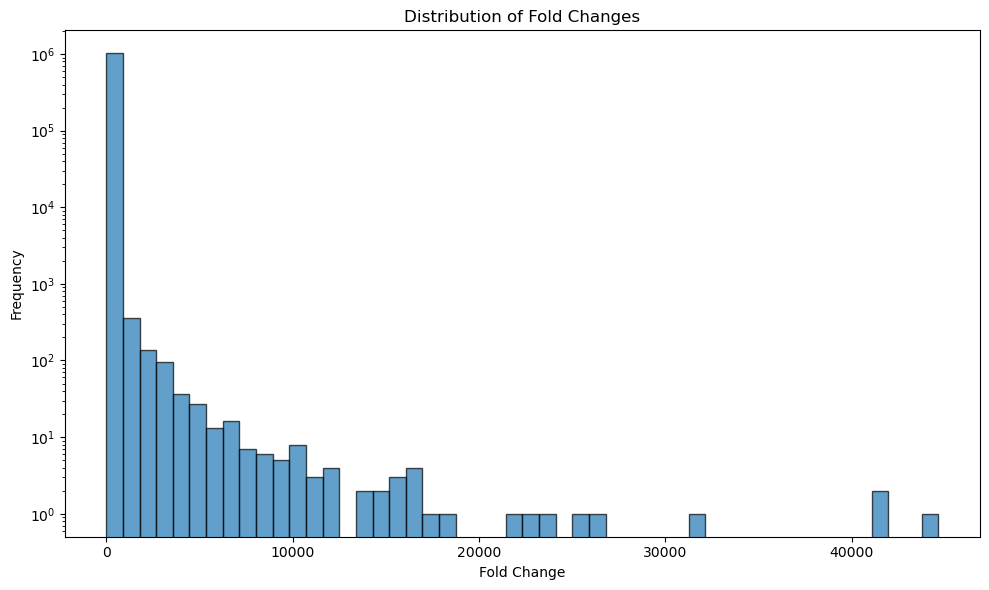

In [48]:

# Clean data: remove inf and NaN values
fold_data_clean = fold_data.replace([np.inf, -np.inf], np.nan).fillna(0)

# 1. Distribution of fold changes
plt.figure(figsize=(10, 6))
finite_values = fold_data_clean.values.flatten()
finite_values = finite_values[np.isfinite(finite_values)]
plt.hist(finite_values, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Fold Change')
plt.ylabel('Frequency')
plt.title('Distribution of Fold Changes')
plt.yscale('log')  # Log scale due to many zeros
plt.tight_layout()
plt.show()

### Interpretation
# Distribution of fold changes across all peptides and samples.
# Log scale helps visualize the wide range of values, especially the many zeros.
# Shows overall data characteristics and identifies potential outliers.

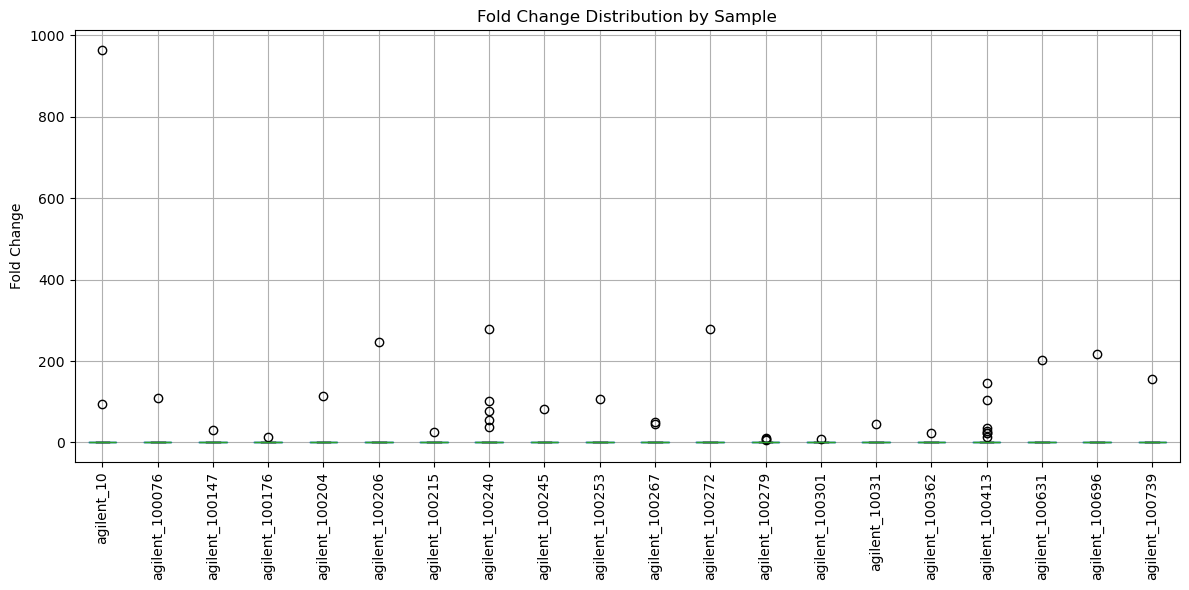

In [49]:
# 2. Boxplot of fold changes by sample
plt.figure(figsize=(12, 6))
sample_cols = fold_data_clean.columns[:20] if len(fold_data_clean.columns) > 20 else fold_data_clean.columns
fold_data_clean[sample_cols].boxplot(rot=90)
plt.title('Fold Change Distribution by Sample')
plt.ylabel('Fold Change')
plt.tight_layout()
plt.show()

### Interpretation
# Boxplot showing fold change distributions across different samples.
# Helps identify samples with unusual distributions, potential batch effects,
# or outlier samples that may need further investigation.

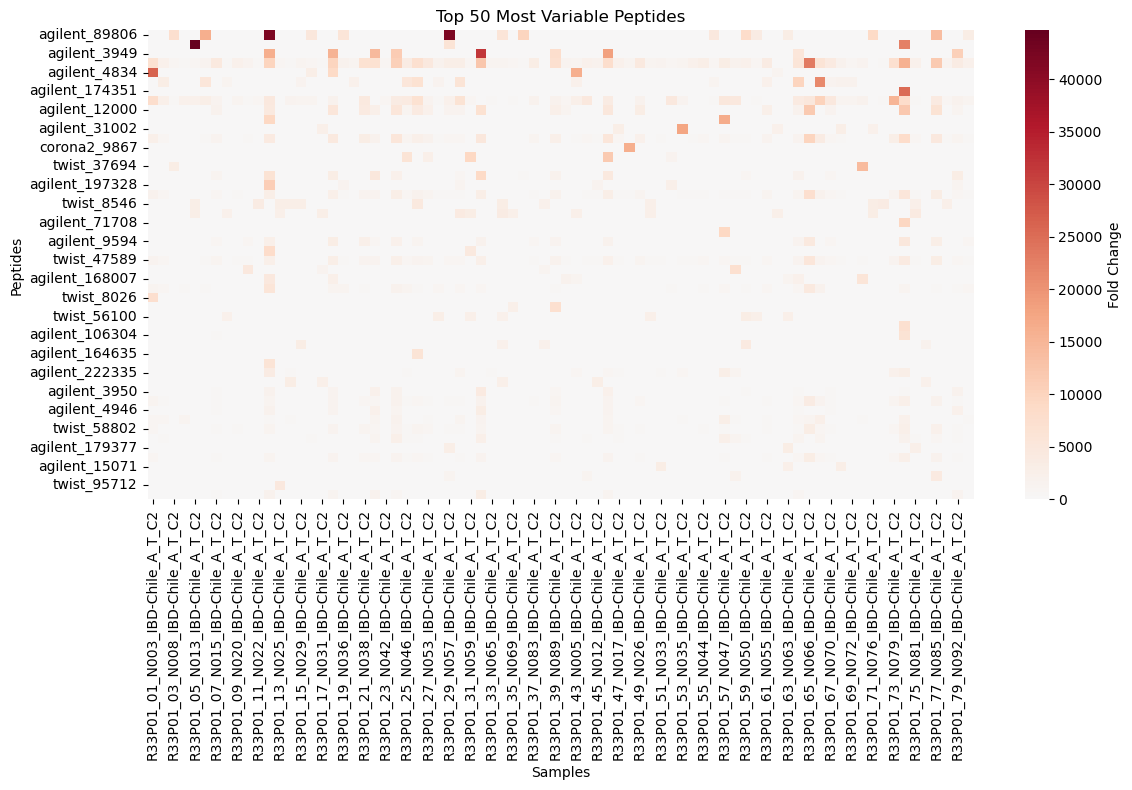

In [50]:
# 3. Heatmap of top variable peptides
plt.figure(figsize=(12, 8))
peptide_var = fold_data_clean.var().sort_values(ascending=False)
top_peptides = peptide_var.head(50).index
sns.heatmap(fold_data_clean[top_peptides].T, cmap='RdBu_r', center=0, 
            cbar_kws={'label': 'Fold Change'})
plt.title('Top 50 Most Variable Peptides')
plt.xlabel('Samples')
plt.ylabel('Peptides')
plt.tight_layout()
plt.show()

### Interpretation
# Heatmap of the 50 most variable peptides across all samples.
# Red indicates high fold changes, blue indicates low/negative changes.
# Helps identify the most informative peptides and potential sample clustering patterns.

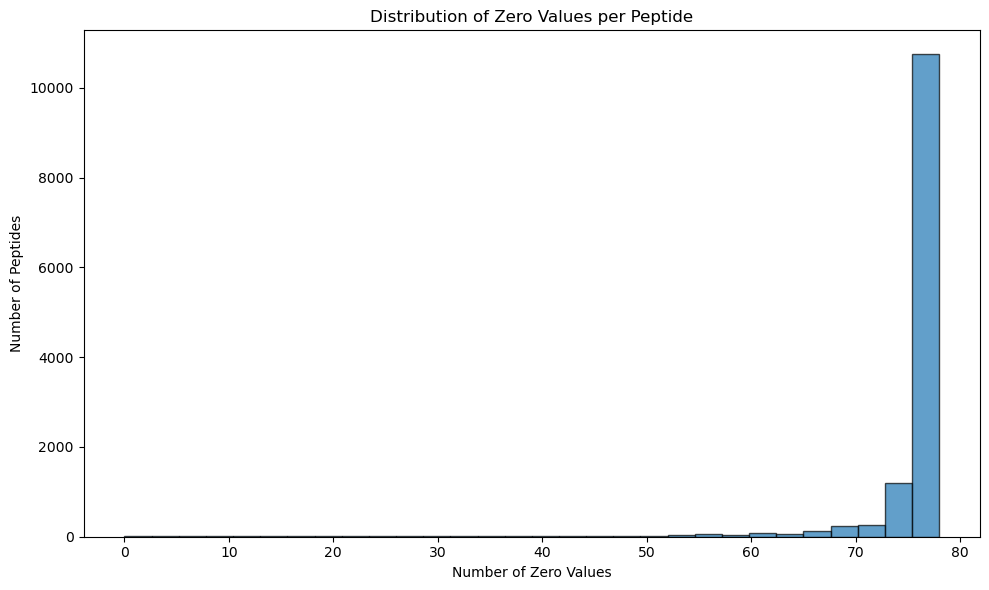

In [51]:
# 4. Zero value distribution
plt.figure(figsize=(10, 6))
zero_counts = fold_data_clean.apply(lambda x: (x == 0).sum(), axis=0)
plt.hist(zero_counts, bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('Number of Zero Values')
plt.ylabel('Number of Peptides')
plt.title('Distribution of Zero Values per Peptide')
plt.tight_layout()
plt.show()

### Interpretation
# Distribution of zero values across peptides, indicating data sparsity.
# Peptides with many zeros may be less informative or need filtering.
# Helps guide data preprocessing and peptide selection strategies.

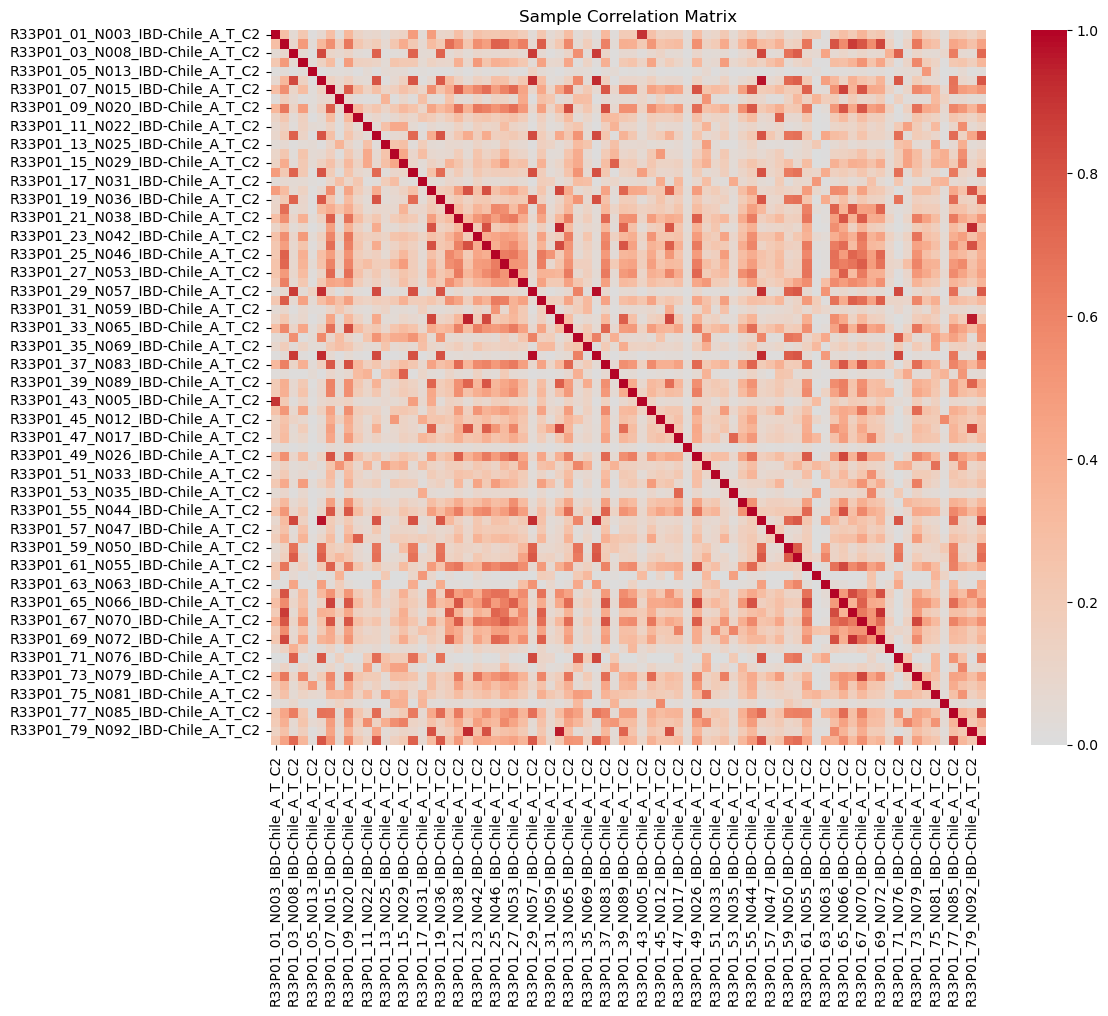

In [52]:
# 5. Sample correlation heatmap
plt.figure(figsize=(12, 10))
sample_corr = fold_data_clean.T.corr()
sns.heatmap(sample_corr, cmap='coolwarm', center=0, square=True)
plt.title('Sample Correlation Matrix')
plt.tight_layout()
plt.show()

### Interpretation
# Correlation matrix between samples based on peptide fold changes.
# High correlations (red) indicate similar immune response patterns.
# Helps identify potential batch effects, sample clustering, or outliers.

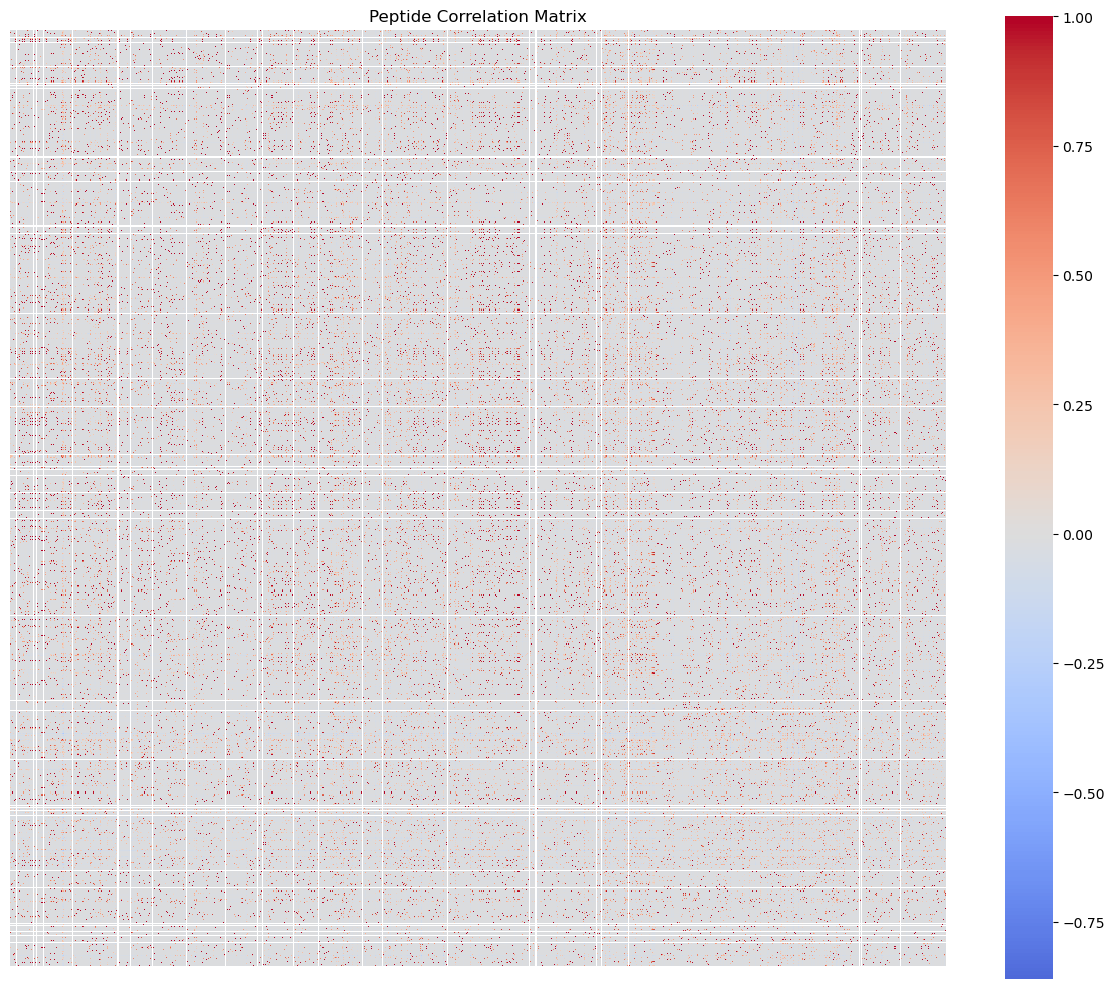

In [53]:
# 6. Peptide correlation heatmap
plt.figure(figsize=(12, 10))
peptide_corr = fold_data_clean.corr()
sns.heatmap(peptide_corr, cmap='coolwarm', center=0, square=True, 
            xticklabels=False, yticklabels=False)
plt.title('Peptide Correlation Matrix')
plt.tight_layout()
plt.show()

### Interpretation
# Correlation matrix between peptides across all samples.
# Reveals co-reactive peptide groups and potential cross-reactivity patterns.
# Blocks of high correlation may indicate peptides from related antigens.

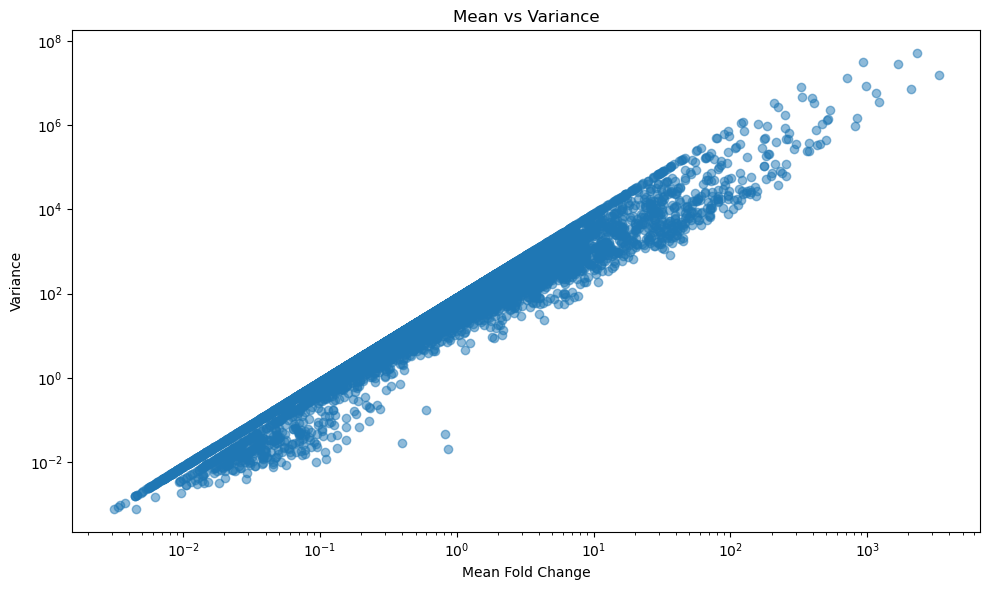

In [54]:
# 7. Mean vs Variance plot
plt.figure(figsize=(10, 6))
peptide_means = fold_data_clean.mean()
peptide_vars = fold_data_clean.var()
# Filter out zero means and vars for log scale
non_zero_mask = (peptide_means > 0) & (peptide_vars > 0)
plt.scatter(peptide_means[non_zero_mask], peptide_vars[non_zero_mask], alpha=0.5)
plt.xlabel('Mean Fold Change')
plt.ylabel('Variance')
plt.title('Mean vs Variance')
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

### Interpretation
# Relationship between mean fold change and variance for each peptide.
# Helps identify peptides with unusual variance patterns - high variance 
# relative to mean may indicate noisy peptides, while consistent patterns
# suggest reliable biomarker candidates.

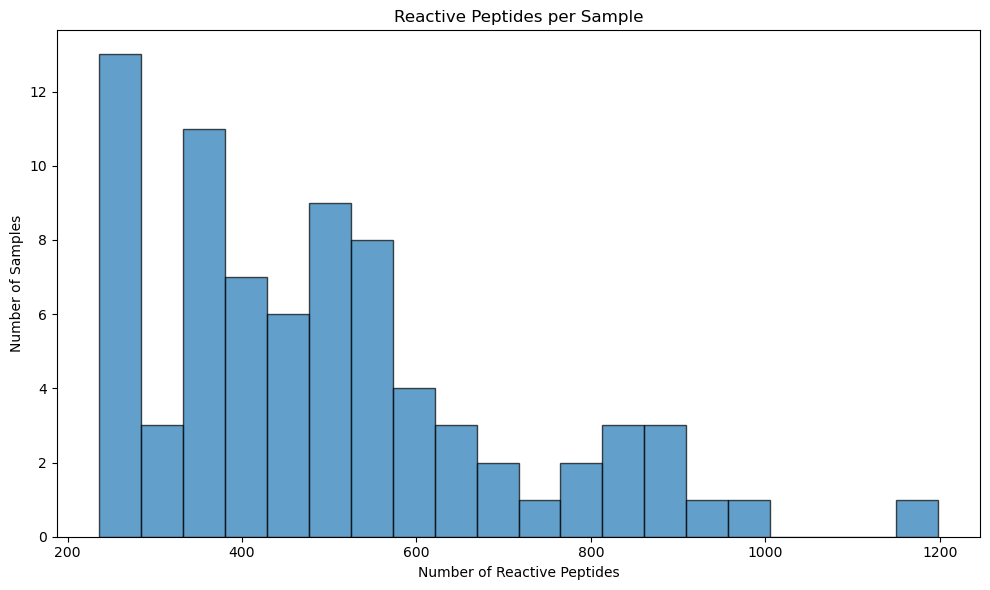

In [55]:
# 8. Number of reactive peptides per sample
plt.figure(figsize=(10, 6))
reactive_peptides = (fold_data_clean > 0).sum(axis=1)
plt.hist(reactive_peptides, bins=20, alpha=0.7, edgecolor='black')
plt.xlabel('Number of Reactive Peptides')
plt.ylabel('Number of Samples')
plt.title('Reactive Peptides per Sample')
plt.tight_layout()
plt.show()

### Interpretation
# Distribution of the number of reactive peptides per sample.
# Shows the breadth of immune responses - some samples may have broad
# reactivity while others are more focused. Helps identify outlier samples.

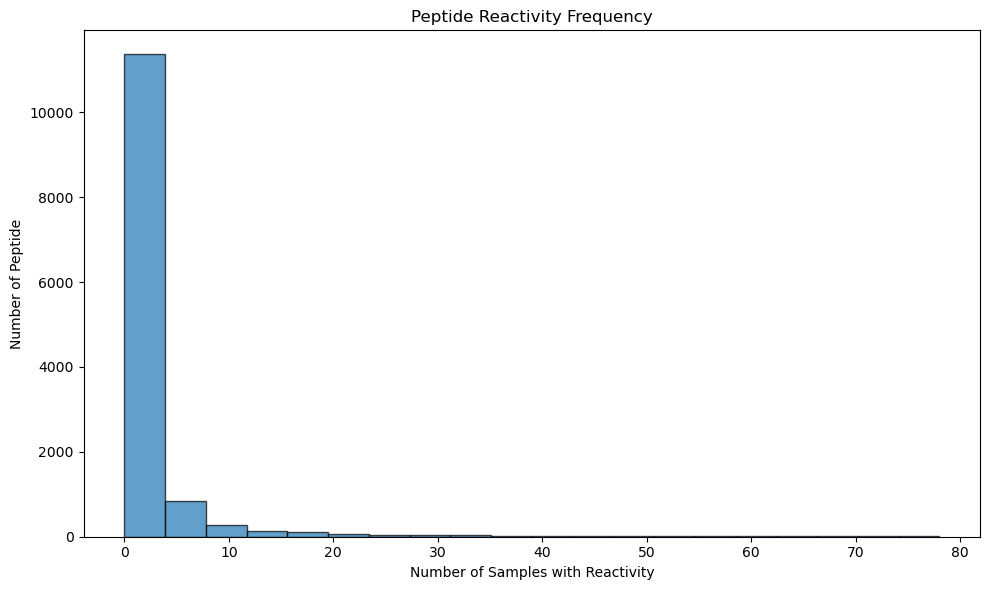

In [56]:
# 9. Peptide reactivity frequency
plt.figure(figsize=(10, 6))
peptide_reactivity = (fold_data_clean > 0).sum(axis=0)
plt.hist(peptide_reactivity, bins=20, alpha=0.7, edgecolor='black')
plt.xlabel('Number of Samples with Reactivity')
plt.ylabel('Number of Peptide')
plt.title('Peptide Reactivity Frequency')
plt.tight_layout()
plt.show()

### Interpretation
# Histogram showing the frequency of peptide reactivity across samples.
# Counts how many samples each peptide is reactive in (fold change > 0).
# X axis: number of samples with reactivity, Y axis: number of peptides.

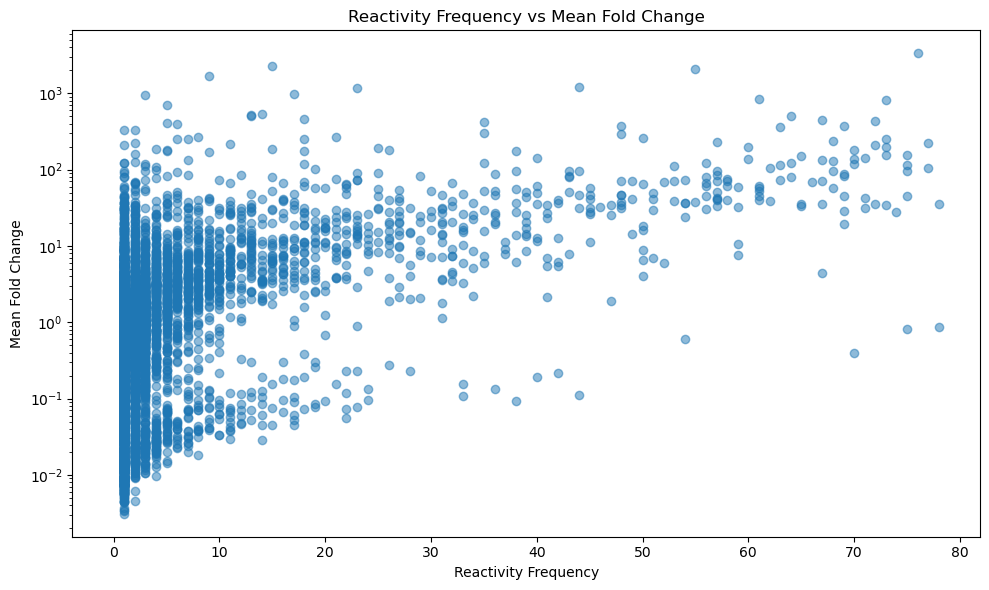

In [57]:
# 10. Fold change vs reactivity frequency
plt.figure(figsize=(10, 6))
mean_fold = fold_data_clean.mean()
reactivity_freq = (fold_data_clean > 0).sum(axis=0)
plt.scatter(reactivity_freq, mean_fold, alpha=0.5)
plt.xlabel('Reactivity Frequency')
plt.ylabel('Mean Fold Change')
plt.title('Reactivity Frequency vs Mean Fold Change')
# plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

### Interpretation
# Relationship between how frequently a peptide is reactive and its average intensity.
# Peptides in the top-right are frequently reactive with high intensity - potential
# general biomarkers. Bottom-right peptides are frequent but low intensity.

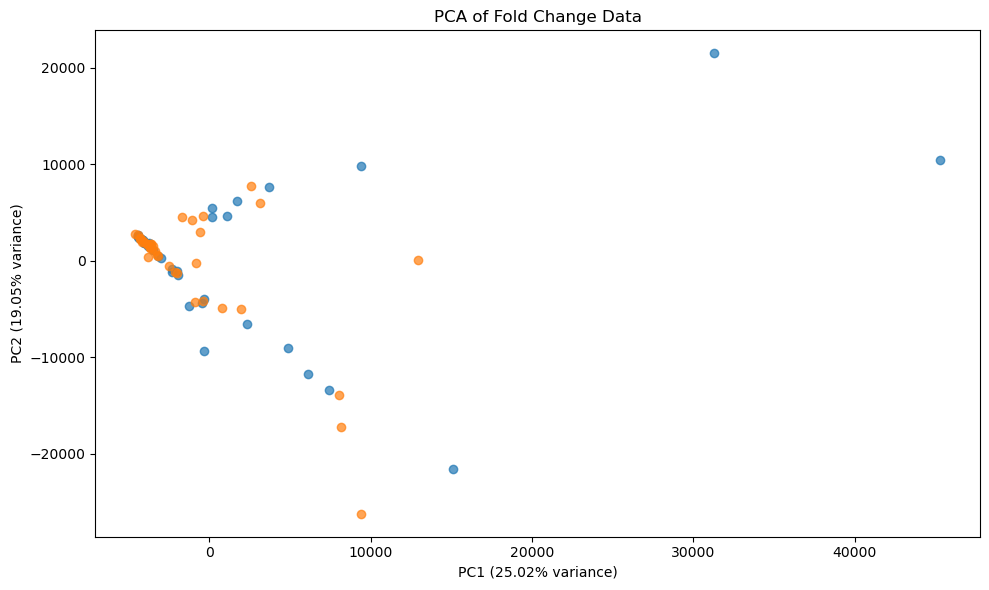

In [58]:
# 11. Principal Component Analysis
from sklearn.decomposition import PCA
fold_with_cohort = fold_data_clean.copy()

fold_with_cohort['cohort'] = diagnosis.loc[fold_data_clean.index, 'cohort'].values

plt.figure(figsize=(10, 6))
pca = PCA(n_components=2)
pca_result = pca.fit_transform(fold_data_clean)

for cohort in fold_with_cohort['cohort'].unique():
    group_mask = fold_with_cohort['cohort'] == cohort
    plt.scatter(pca_result[group_mask, 0], pca_result[group_mask, 1], 
                label=cohort, alpha=0.7)    

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA of Fold Change Data')

plt.tight_layout()
plt.show()

### Interpretation
# Principal component analysis showing sample separation in reduced dimensions.
# Good separation between cohorts suggests distinct immune response patterns.
# Clustering within groups indicates consistent responses within each cohort.

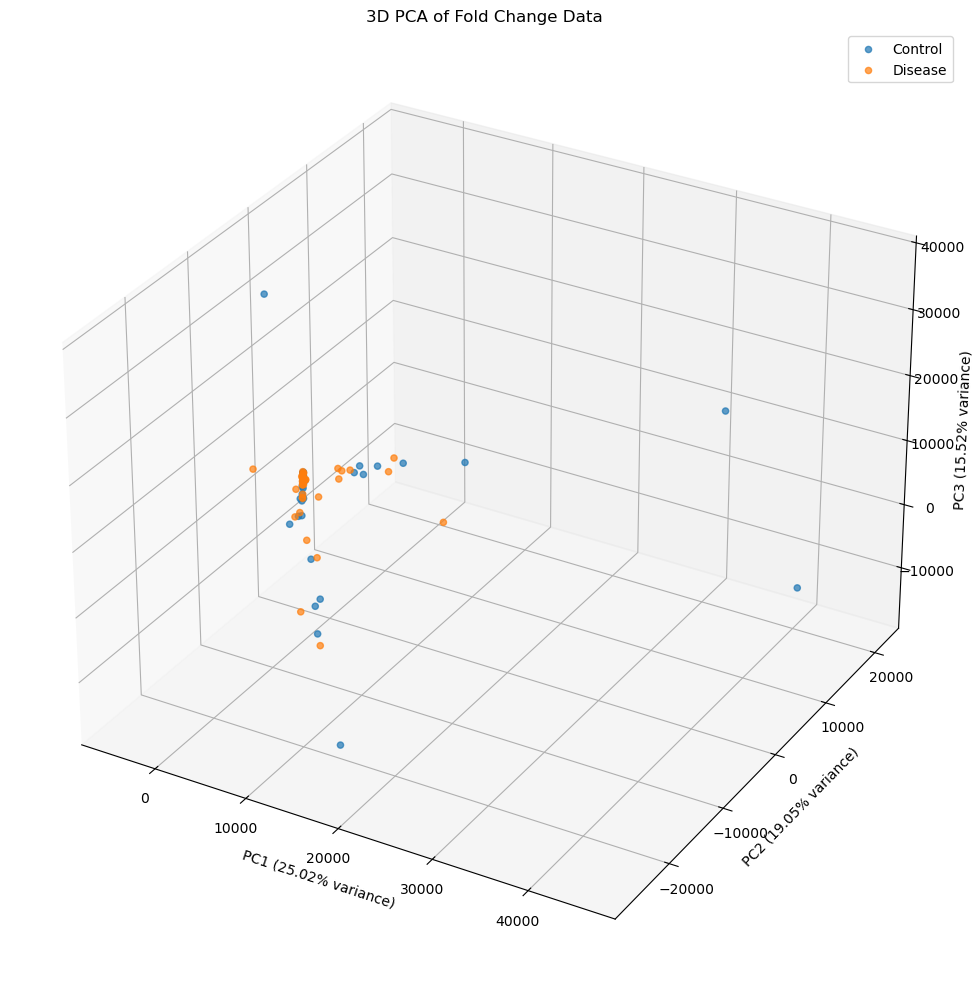

In [59]:
# 11.5 PCA 3D
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
pca = PCA(n_components=3)
pca_result = pca.fit_transform(fold_data_clean) 
for cohort in fold_with_cohort['cohort'].unique():
    group_mask = fold_with_cohort['cohort'] == cohort
    ax.scatter(pca_result[group_mask, 0], pca_result[group_mask, 1], 
               pca_result[group_mask, 2], label=cohort, alpha=0.7)
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]:.2%} variance)')
ax.set_title('3D PCA of Fold Change Data')
ax.legend()
plt.tight_layout()
plt.show()

/Users/gabrielmiranda/micromamba/envs/SaaLab/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gabrielmiranda/micromamba/envs/SaaLab/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


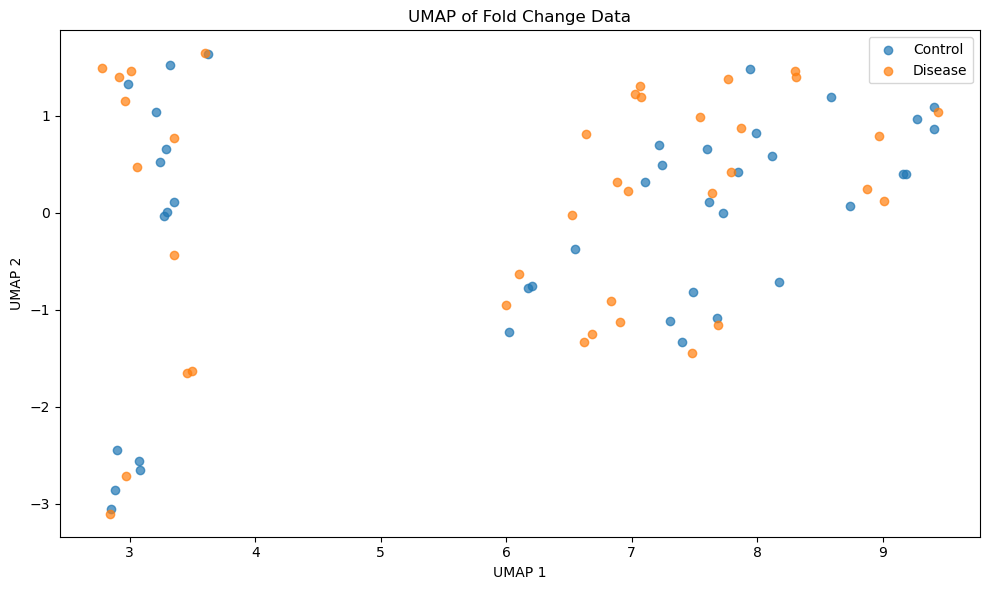

In [60]:
# 11.6 UMAP visualization
import umap
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Create UMAP embedding
reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=5, min_dist=0.01)
umap_result = reducer.fit_transform(fold_data_clean)

# Plot with cohort colors
for cohort in fold_with_cohort['cohort'].unique():
    group_mask = fold_with_cohort['cohort'] == cohort
    plt.scatter(umap_result[group_mask, 0], umap_result[group_mask, 1], 
                label=cohort, alpha=0.7)

plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP of Fold Change Data')
plt.legend()
plt.tight_layout()
plt.show()

### Interpretation
# UMAP (Uniform Manifold Approximation and Projection) provides non-linear 
# dimensionality reduction that often preserves local structure better than PCA.
# Good separation between cohorts suggests distinct immune response patterns.
# UMAP can reveal clusters and relationships that linear methods like PCA might miss.

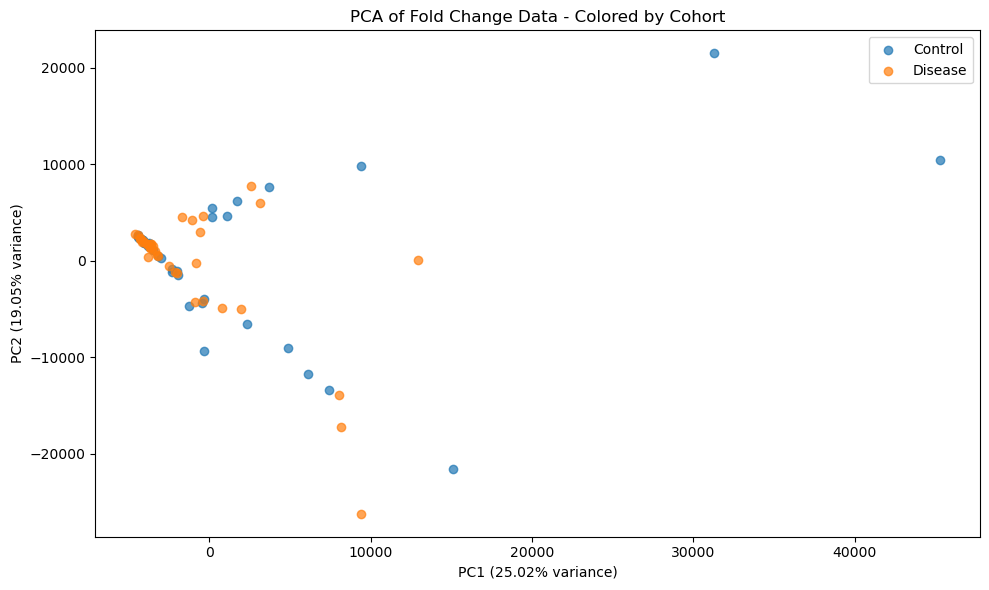

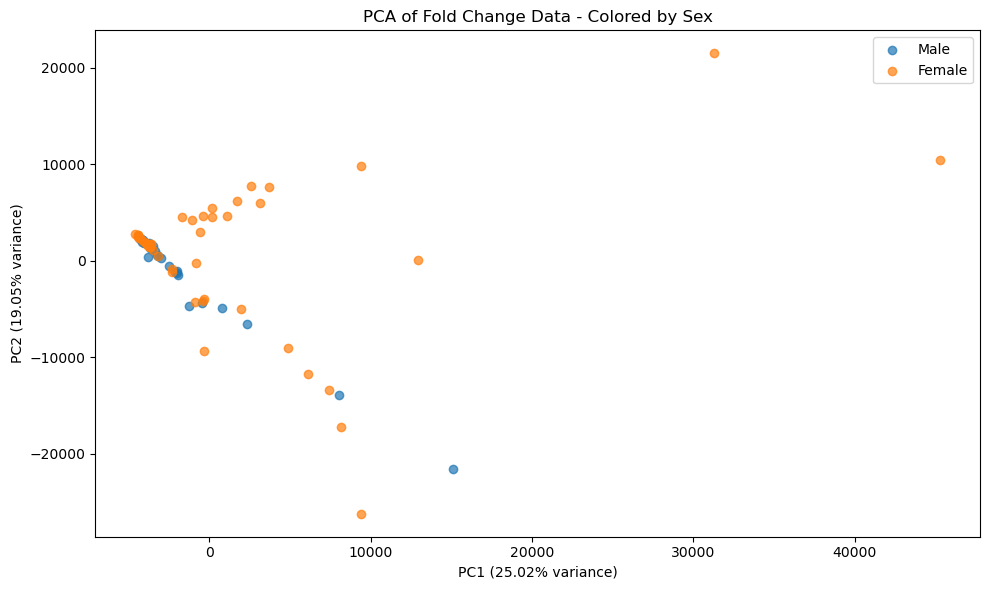

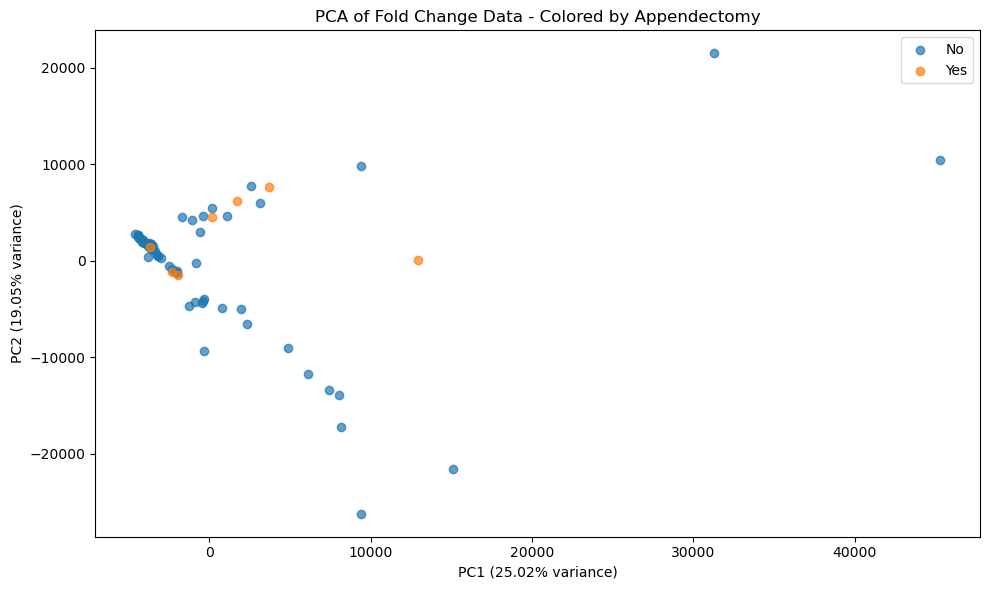

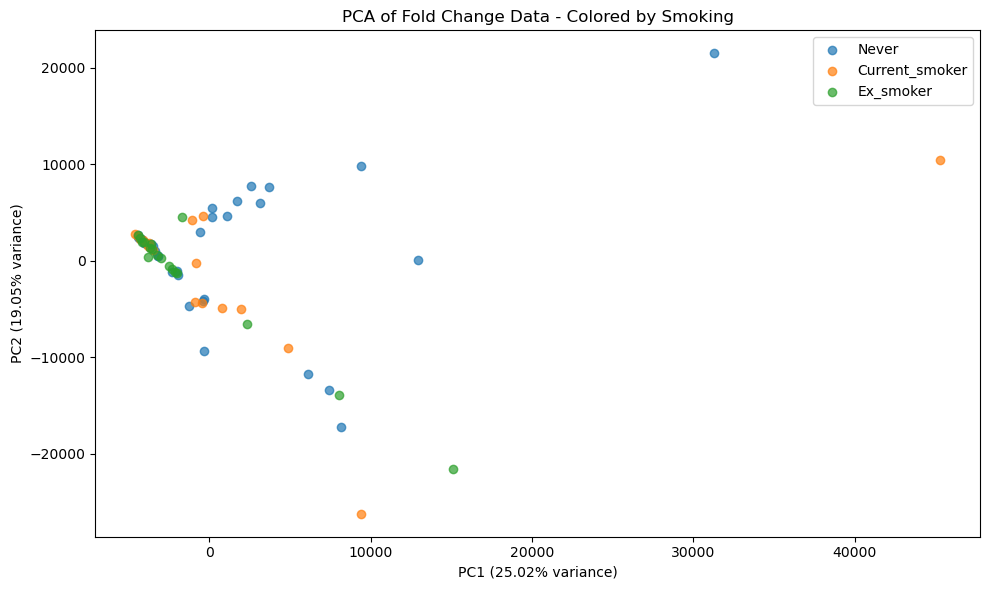

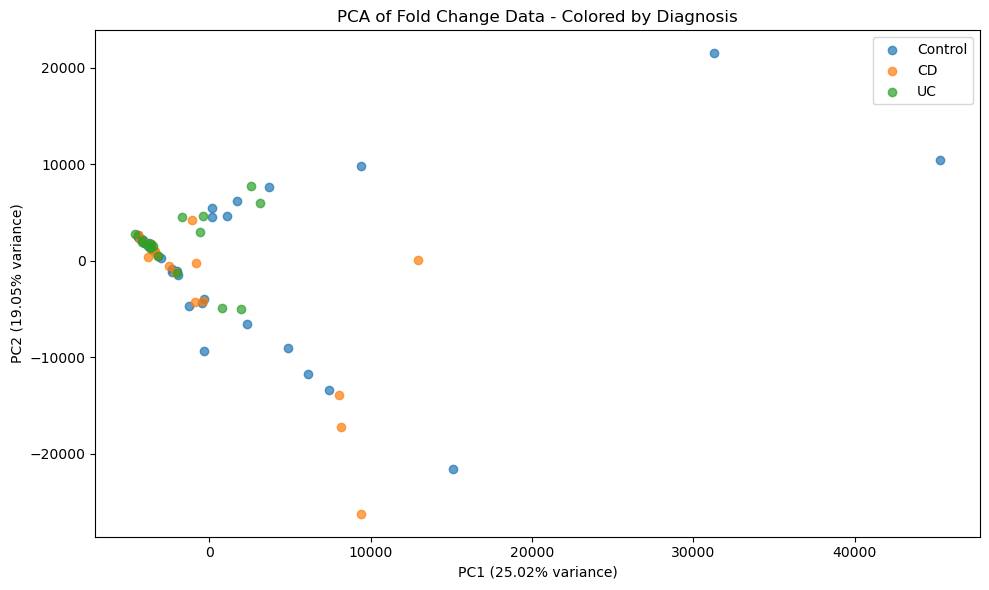

In [61]:
# 11.7 PCA colored by different variables
from sklearn.decomposition import PCA

# Add all diagnosis variables to fold data
fold_with_all_vars = fold_data_clean.copy()
for col in ['cohort', 'sex', 'appendectomy', 'smoking', 'diagnosis']:
    fold_with_all_vars[col] = diagnosis.loc[fold_data_clean.index, col].values

# Compute PCA once
pca = PCA(n_components=2)
pca_result = pca.fit_transform(fold_data_clean)

# Create individual plots for each variable
variables = ['cohort', 'sex', 'appendectomy', 'smoking', 'diagnosis']

for var in variables:
    plt.figure(figsize=(10, 6))
    
    for group in fold_with_all_vars[var].unique():
        if pd.notna(group):  # Skip NaN values
            group_mask = fold_with_all_vars[var] == group
            plt.scatter(pca_result[group_mask, 0], pca_result[group_mask, 1], 
                       label=str(group), alpha=0.7)
    
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
    plt.title(f'PCA of Fold Change Data - Colored by {var.title()}')
    plt.legend()
    plt.tight_layout()
    plt.show()

### Interpretation
# Individual PCA plots colored by different clinical variables.
# Each plot shows potential clustering or separation based on specific conditions.
# Helps identify which variables are associated with distinct immune response patterns.

/Users/gabrielmiranda/micromamba/envs/SaaLab/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gabrielmiranda/micromamba/envs/SaaLab/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


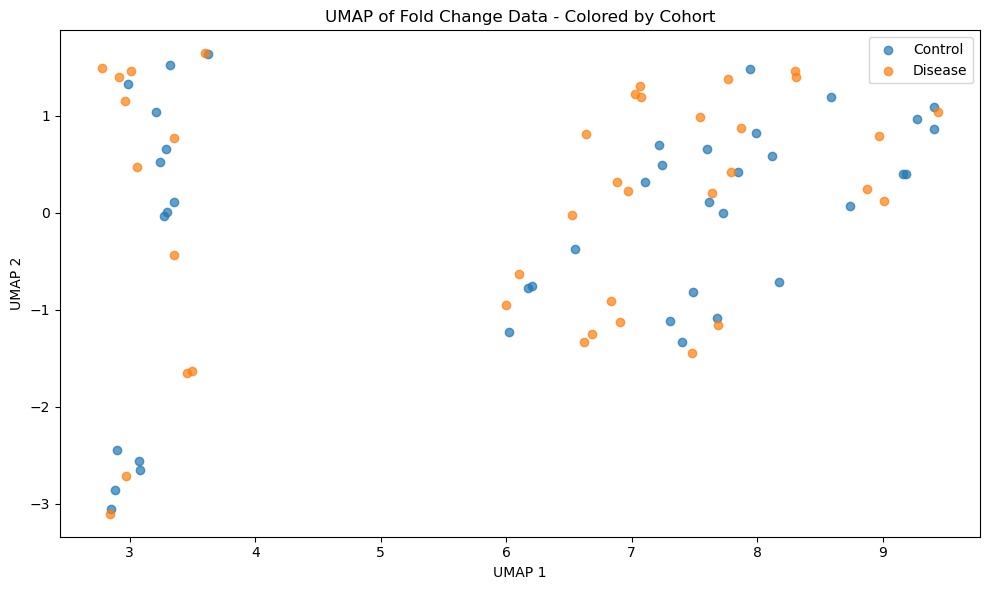

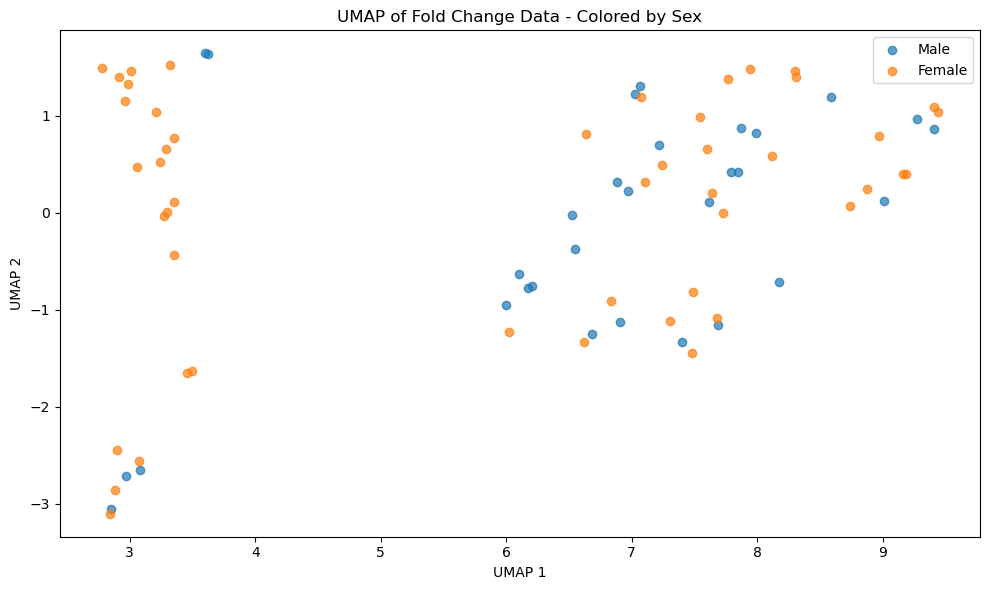

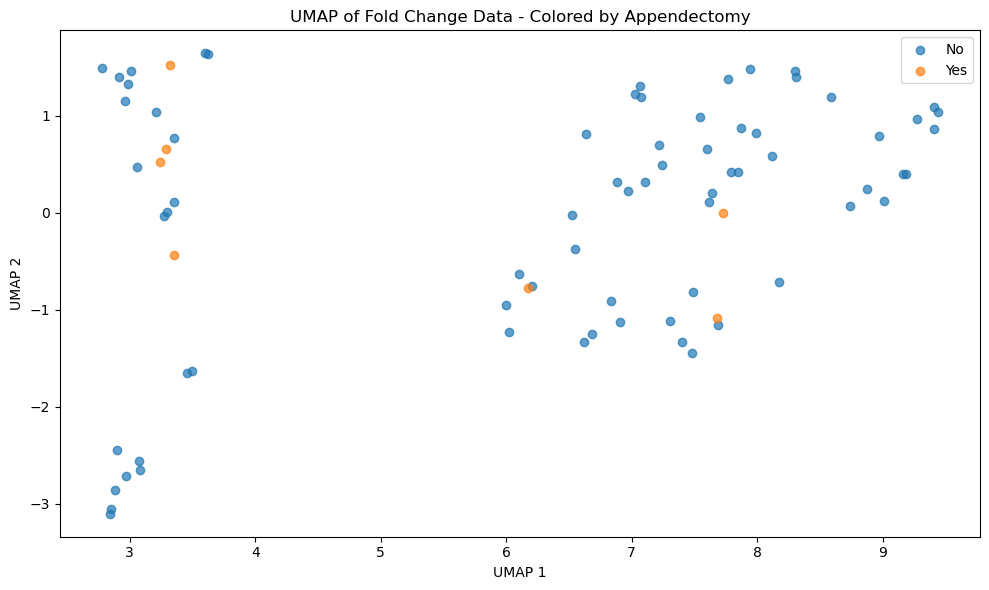

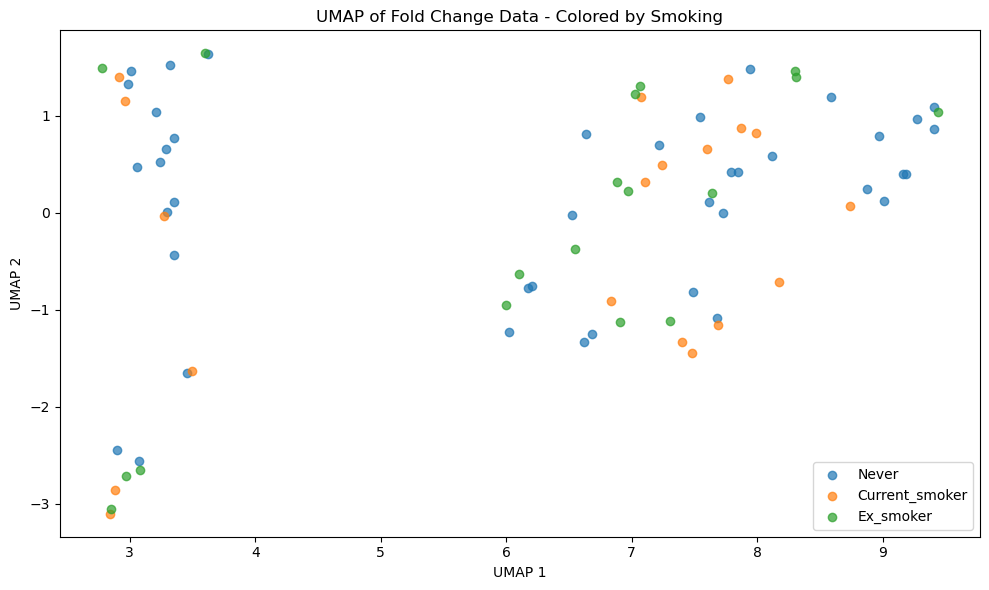

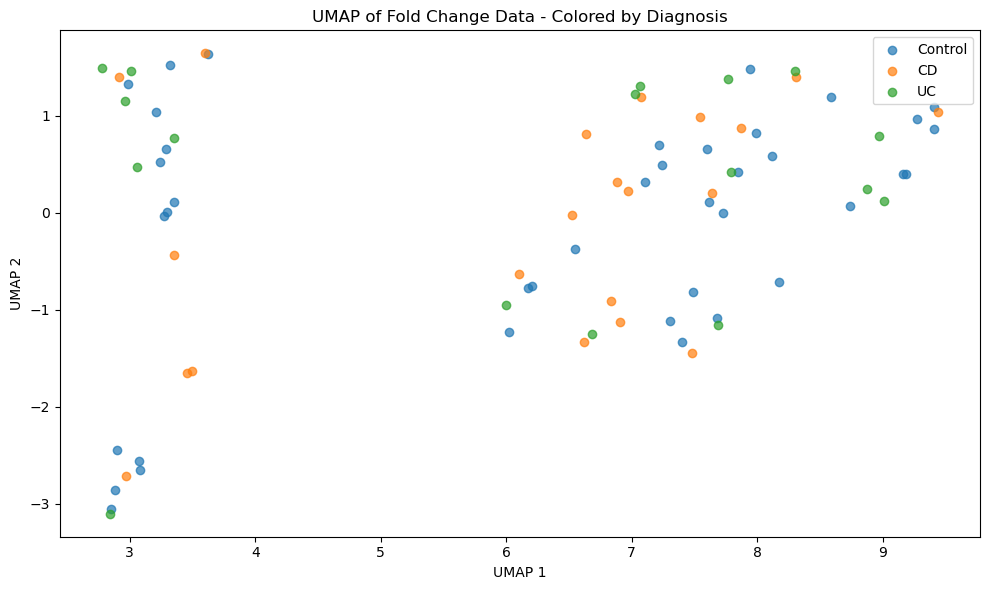

In [62]:
# 11.8 UMAP colored by different variables
import umap

# Compute UMAP once
reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=5, min_dist=0.01)
umap_result = reducer.fit_transform(fold_data_clean)

# Create individual UMAP plots for each variable
variables = ['cohort', 'sex', 'appendectomy', 'smoking', 'diagnosis']

for var in variables:
    plt.figure(figsize=(10, 6))
    
    for group in fold_with_all_vars[var].unique():
        if pd.notna(group):  # Skip NaN values
            group_mask = fold_with_all_vars[var] == group
            plt.scatter(umap_result[group_mask, 0], umap_result[group_mask, 1], 
                       label=str(group), alpha=0.7)
    
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.title(f'UMAP of Fold Change Data - Colored by {var.title()}')
    plt.legend()
    plt.tight_layout()
    plt.show()

### Interpretation
# Individual UMAP plots colored by different clinical variables.
# UMAP's non-linear approach may reveal different clustering patterns than PCA.
# Compare with PCA results to see which variables show consistent separation
# across both linear and non-linear dimensionality reduction methods.

/Users/gabrielmiranda/micromamba/envs/SaaLab/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


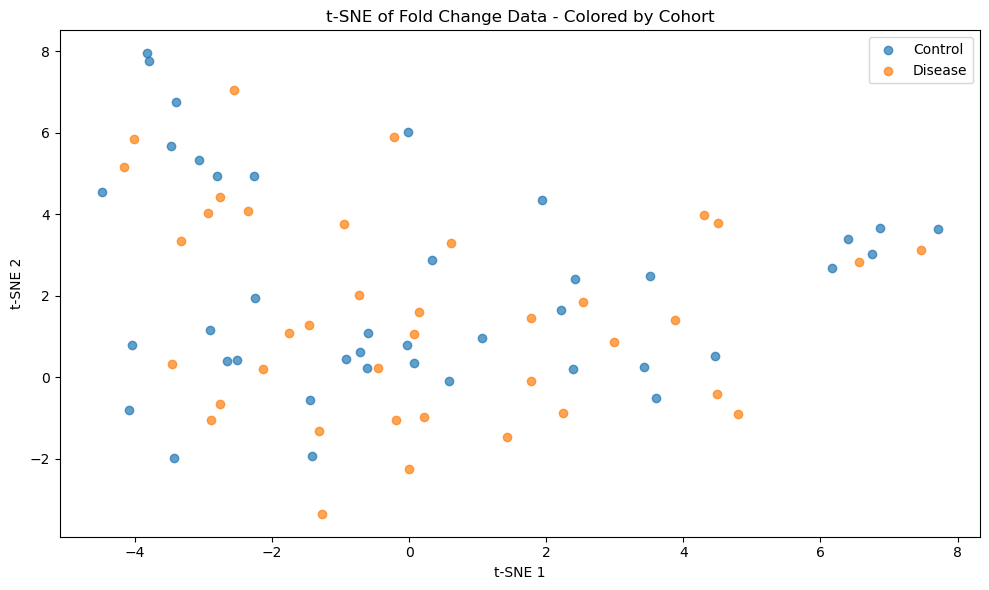

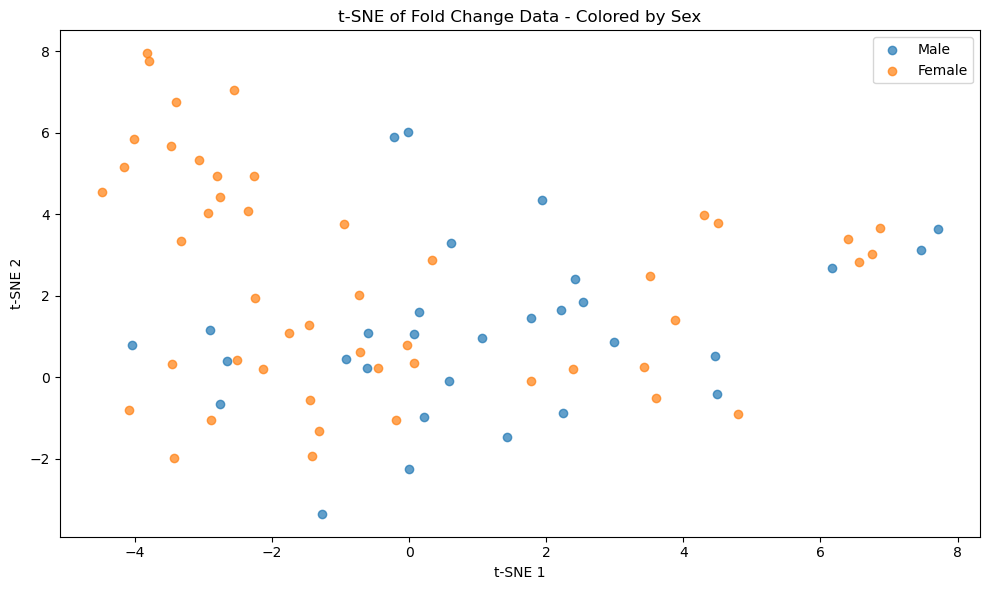

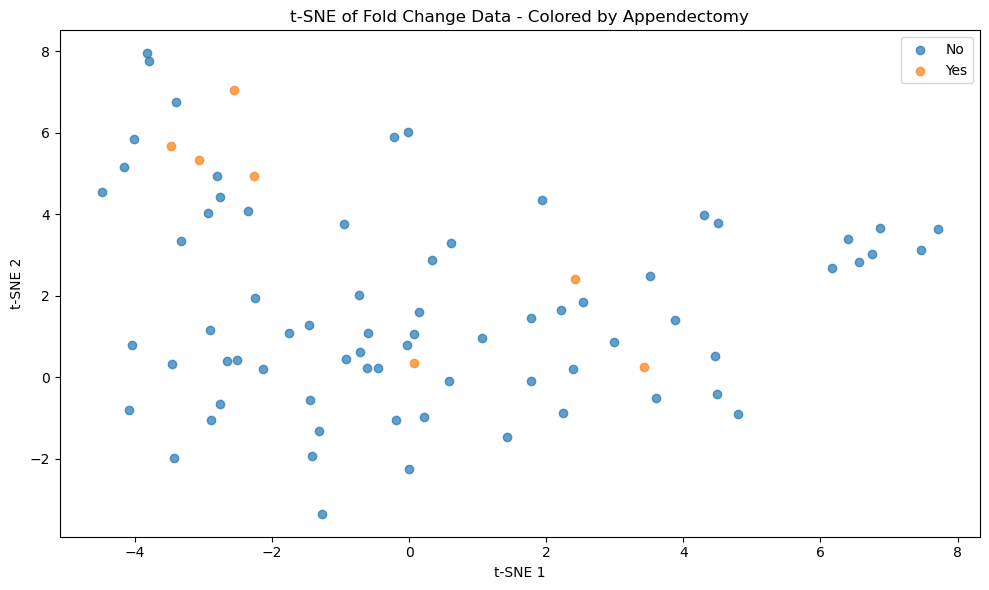

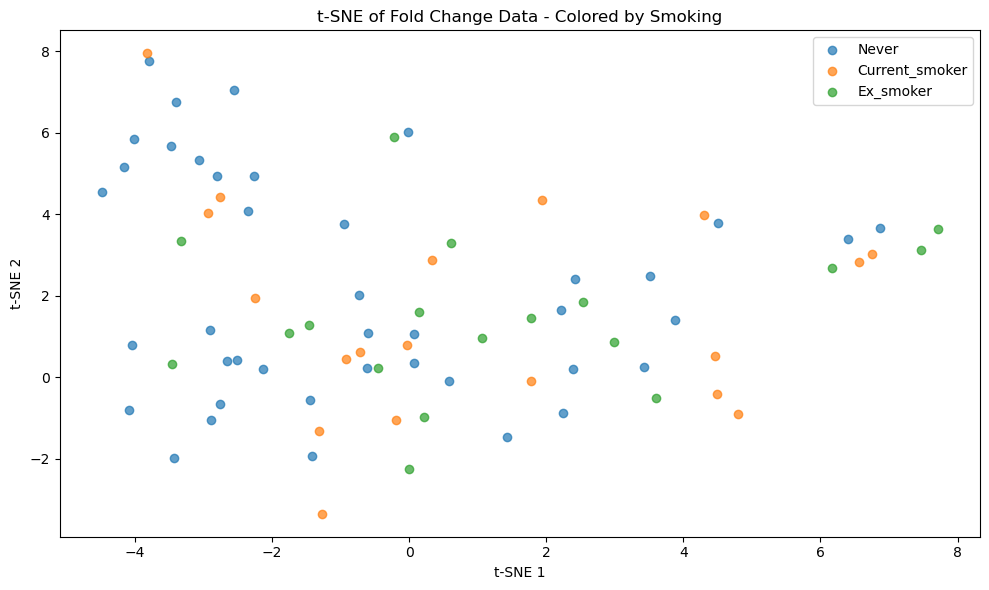

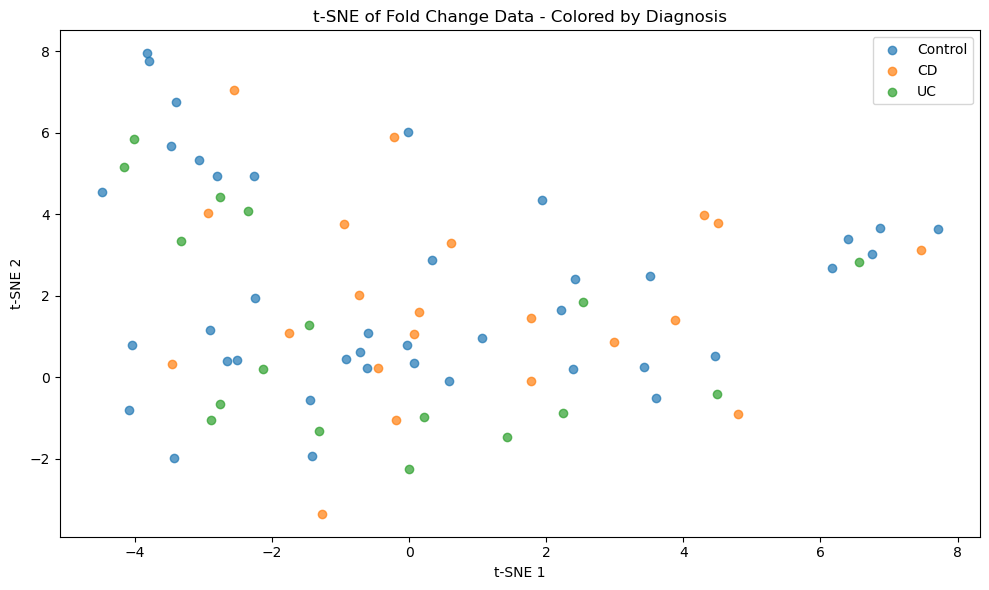

In [66]:
# 11.9 t-SNE colored by different variables
from sklearn.manifold import TSNE

# Compute t-SNE once
tsne = TSNE(n_components=2, random_state=42, perplexity=20, n_iter=1000)
tsne_result = tsne.fit_transform(fold_data_clean)

# Create individual t-SNE plots for each variable
variables = ['cohort', 'sex', 'appendectomy', 'smoking', 'diagnosis']

for var in variables:
    plt.figure(figsize=(10, 6))
    
    for group in fold_with_all_vars[var].unique():
        if pd.notna(group):  # Skip NaN values
            group_mask = fold_with_all_vars[var] == group
            plt.scatter(tsne_result[group_mask, 0], tsne_result[group_mask, 1], 
                       label=str(group), alpha=0.7)
    
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.title(f't-SNE of Fold Change Data - Colored by {var.title()}')
    plt.legend()
    plt.tight_layout()
    plt.show()

### Interpretation
# Individual t-SNE plots colored by different clinical variables.
# t-SNE excels at revealing local clustering structure and may show different
# patterns compared to PCA and UMAP. Good for identifying tight clusters
# and local neighborhood relationships within each clinical group.

/var/folders/zv/p838yyl57rb2tlk802d5y2hh0000gn/T/ipykernel_33587/118230334.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  reactive_by_cohort = fold_with_cohort.groupby('cohort').apply(


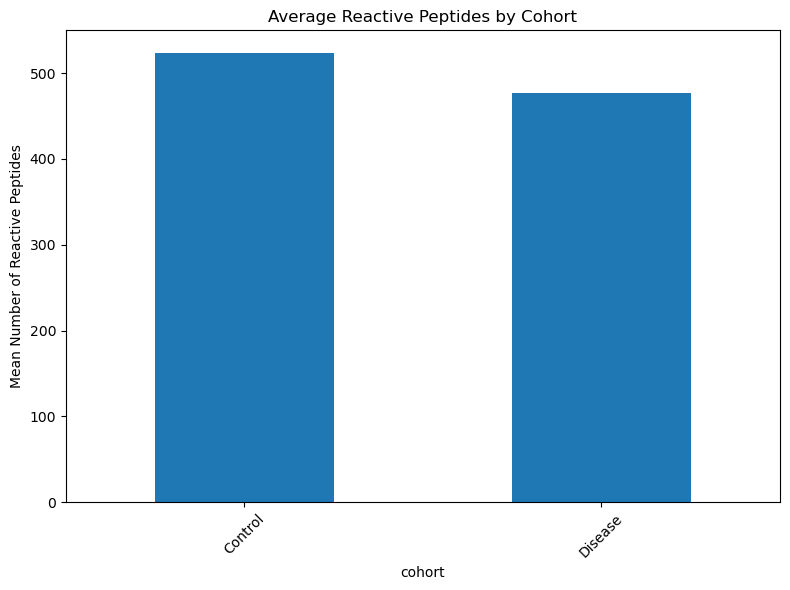

In [64]:
# 12. Average reactive peptides by cohort
plt.figure(figsize=(8, 6))
reactive_by_cohort = fold_with_cohort.groupby('cohort').apply(
    lambda x: (x.drop('cohort', axis=1) > 0).sum(axis=1).mean()
)
reactive_by_cohort.plot(kind='bar')
plt.title('Average Reactive Peptides by Cohort')
plt.ylabel('Mean Number of Reactive Peptides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Interpretation
# Comparison of average number of reactive peptides between cohorts.
# Significant differences may indicate broader immune activation in
# one group compared to another, suggesting disease-related immune responses.

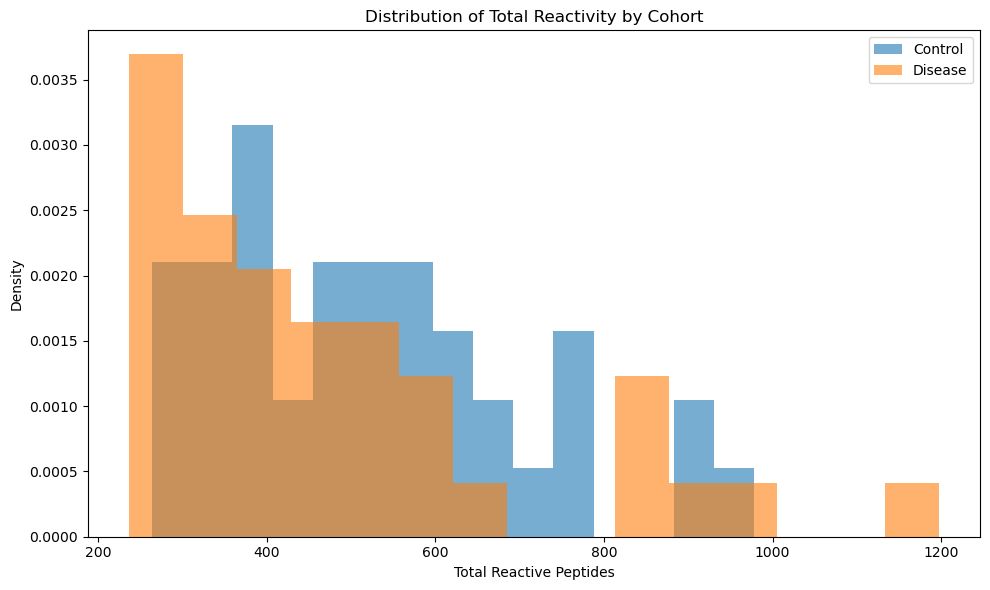

In [65]:
# 13. Distribution of total reactivity by cohort
plt.figure(figsize=(10, 6))
total_reactivity = (fold_data_clean > 0).sum(axis=1)
cohort_labels = fold_with_cohort['cohort']
for cohort in cohort_labels.unique():
    cohort_data = total_reactivity[cohort_labels == cohort]
    plt.hist(cohort_data, bins=15, alpha=0.6, label=cohort, density=True)
plt.xlabel('Total Reactive Peptides')
plt.ylabel('Density')
plt.title('Distribution of Total Reactivity by Cohort')
plt.legend()
plt.tight_layout()
plt.show()

### Interpretation
# Overlapping histograms showing distribution of total reactive peptides per sample
# for each cohort. Differences in distribution shapes or positions indicate
# distinct immune response patterns between disease and control groups.